

# Project: Investigating TMDB Movie Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **TMDB movie** dataset has been selected to complete this project.The dataset consists of 21 sifferent types of information such as budget,revenue,title,rating,popularity,genre etc for 10866 different movies.

>Effective use of python's libraries such as numpy,pandas and matlibplot can help in producing some amazing results by analysing the dataset.Though this is an open ended project where findings can differ depending upon person to person,hence there is no right outcome for the project.

>There are a bunch of questions and intuitions that arise while performing the analysis of the dataset like :                   

#### Question 1 : Profit made by each movie
#### Question 2 : Analysising the movies with highest and lowest profit,budget and revenue
#### Question 3 : Analysis of Financial Data 
#### Question 4 : Comparing the vote_average and profit made by each movie and forming a graph
#### Question 5 : Finding the number of movies released each year
#### Question 6 : Cataegorising movies as hits and flops based on vote_average
#### Question 7 : Plotting Profit vs Popularity
#### Question 8 : Runtime distribution of all movies
#### Question 9 : Finding the most repeated genres
#### Question 10 : Finding the most repeated cast and directors of hit movies
  

In [2]:
# Importing all the libraries required for analysis of this dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<a id='wrangling'></a>
## Data Wrangling

>  In this section of the report, data has been loaded, checked for cleanliness, and then trimed and cleaned for analysis.

### General Properties

In [3]:
#loading the tmdb-movies.csv file using the pandas read_csv function. df variable stores the dataset in foam of a dataframe
df = pd.read_csv('tmdb-movies.csv')

In [4]:
#using df.shape to find out the number of rows and columns present in the dataset
rows,columns = df.shape
print('We have {} total entries of movies and {} columns/features of it.'.format(rows-1, columns))

We have 10865 total entries of movies and 21 columns/features of it.


In [5]:
#info() function helps us in finding the number of entries in each column and the associated data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [6]:
#head() function gives us the first five datapoints in our dataset
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


> **Observations from the above execution of codes**: 
<ol>
<p>Based on the questions that have been pitched,columns like imdb_id,homepage,tagline,keywords,overview,production_companies,budget_adj,revenue_adj are not required.We will assume the currency values to be in dollars for revenue and budget.We also need to convert the datatype of the release_data column.</p>
<p>There are several columns having missing values like cast,director and genre having null or missing values.</p>


## Data Cleaning 
 <p> 1.) We need to imdb_id,homepage,tagline,keywords,overview,production_companies,budget_adj,revenue_adj -columns.</p>
  <p> 2.) The datatypes of budget and revenue coloumn needs to be changed to 'int64' and that of release_date to 'date_time'.</p>
  <p> 3.)Some movies in the database have zero budget or zero revenue, that is there value has not been recorded so we will be discarding such entries</p>
  <p> 4.) Missing values need to be replaced with NaN.</p>
  <p> 5.) The duplicated datapoints needs to be removed.</p>

In [7]:
#drop() function is used to drop all the columms which are not required for the analysis
#imdb_id,homepage,tagline,keywords,overview,production_companies,budget_adj,revenue_adj -columns needs to be dropped

df=df.drop(['imdb_id','homepage','tagline','overview','keywords','production_companies','budget_adj','revenue_adj'],axis=1)

In [8]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [9]:
rows,columns = df.shape
print('We have {} total entries of movies and {} columns remainig.'.format(rows-1, columns))

We have 10865 total entries of movies and 13 columns remainig.


<p> Checking the number of duplicated values and removing them </p>

In [10]:
sum(df.duplicated())

1

In [11]:
#pandas drop_duplicates() function removes all the duplicated values
df.drop_duplicates(inplace=True)

In [12]:
#checking the presence of duplicates once again,this time output should be 0
sum(df.duplicated())

0

<p>Checking the number of nulls in the dataframe under various columns and 
replacing it with '0' for columns with string datatypes</p>

In [13]:
df.isnull().sum()

id                 0
popularity         0
budget             0
revenue            0
original_title     0
cast              76
director          44
runtime            0
genres            23
release_date       0
vote_count         0
vote_average       0
release_year       0
dtype: int64

In [14]:
#the fillna() function fills all the nulls with desired value
#filling the missing values with string '0'
df.cast.fillna('0',inplace = True)

In [15]:
df.director.fillna('0',inplace = True)

In [16]:
df.genres.fillna('0',inplace = True)

In [17]:
#checking if the execution worked,this time the isnull() should output 0 for cast,director,genre columns
df.isnull().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

### Removing the 0's from the budget and revenue columns

In [18]:
# creating a seperate list of revenue and budget column
zeroes_list=['budget', 'revenue']

#this will replace all the value from '0' to NAN in the list
df[zeroes_list] = df[zeroes_list].replace(0, np.NAN)

#Removing all the row which has NaN value in zeroes_list 
df.dropna(subset = zeroes_list, inplace = True)

rows, col = df.shape
print('So after removing such entries, we now have only {} no.of movies.'.format(rows-1))


So after removing such entries, we now have only 3853 no.of movies.


### Changing the data types of revenue,budget and release_data columns


In [19]:
#astype() changes the data type of the column to the desired type
df['revenue'] = df['revenue'].astype('int64')
df['budget'] = df['budget'].astype('int64')
#pandas to_datetime function is used to change the data type to date time format
df['release_date'] = pd.to_datetime(df['release_date'])

In [20]:
#checking and confirming these changes using dtypes
df.dtypes

id                         int64
popularity               float64
budget                     int64
revenue                    int64
original_title            object
cast                      object
director                  object
runtime                    int64
genres                    object
release_date      datetime64[ns]
vote_count                 int64
vote_average             float64
release_year               int64
dtype: object

In [21]:
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015


<a id='eda'></a>
## Exploratory Data Analysis

>In this section we  compute statistics and create visualizations with the goal of addressing the research questions that has been posed in the Introduction section.

### Question 1 : Profit made by each movie

In [22]:
#Here we insert a new column in our dataset where we shall subtract the revenue from budget to get profit made by each movie
df['profit'] = df['revenue']-df['budget']
df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.5,2015,1363528810


In [23]:
#Here the columns have been reindexed just to change there position in the dataframe :
df = df.reindex_axis(['id','original_title','director','cast','genres','runtime','release_year','release_date',
                      'popularity','vote_count','vote_average','budget','revenue','profit'], axis=1)
df.head(10)


,id,original_title,director,cast,genres,runtime,release_year,release_date,popularity,vote_count,vote_average,budget,revenue,profit
0,135397,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,124,2015,2015-06-09,32.985763,5562,6.5,150000000,1513528810,1363528810
1,76341,Mad Max: Fury Road,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,120,2015,2015-05-13,28.419936,6185,7.1,150000000,378436354,228436354
2,262500,Insurgent,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,119,2015,2015-03-18,13.112507,2480,6.3,110000000,295238201,185238201
3,140607,Star Wars: The Force Awakens,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,136,2015,2015-12-15,11.173104,5292,7.5,200000000,2068178225,1868178225
4,168259,Furious 7,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,137,2015,2015-04-01,9.335014,2947,7.3,190000000,1506249360,1316249360
5,281957,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Western|Drama|Adventure|Thriller,156,2015,2015-12-25,9.110700,3929,7.2,135000000,532950503,397950503
6,87101,Terminator Genisys,Alan Taylor,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Science Fiction|Action|Thriller|Adventure,125,2015,2015-06-23,8.654359,2598,5.8,155000000,440603537,285603537
7,286217,The Martian,Ridley Scott,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Drama|Adventure|Science Fiction,141,2015,2015-09-30,7.667400,4572,7.6,108000000,595380321,487380321
8,211672,Minions,Kyle Balda|Pierre Coffin,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Family|Animation|Adventure|Comedy,91,2015,2015-06-17,7.404165,2893,6.5,74000000,1156730962,1082730962
9,150540,Inside Out,Pete Docter,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Comedy|Animation|Family,94,2015,2015-06-09,6.326804,3935,8.0,175000000,853708609,678708609


<p> The desired changes are observed in the dataframe </p>

### Question 2 : Analysising the movies with highest and lowest profit,budget and revenue

In [24]:
#creating a function calulate_high_low 
import pprint
#defining the function
def calculate_high_low(column):
    #for highest earned profit
    high= df[column].idxmax()
    high_details=pd.DataFrame(df.loc[high])
    
    #for lowest earned profit
    low= df[column].idxmin()
    low_details=pd.DataFrame(df.loc[low])
    
    #concatinating both the dataframes
    info=pd.concat([high_details, low_details], axis=1)
    
    return info
    

In [25]:
#calling the function and sending profit as argument
calculate_high_low('profit')

,1386,2244
id,19995,46528
original_title,Avatar,The Warrior's Way
director,James Cameron,Sngmoo Lee
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...
genres,Action|Adventure|Fantasy|Science Fiction,Adventure|Fantasy|Action|Western|Thriller
runtime,162,100
release_year,2009,2010
release_date,2009-12-10 00:00:00,2010-12-02 00:00:00
popularity,9.43277,0.25054
vote_count,8458,74


In [26]:
#calling the function and sending revenue as argument
calculate_high_low('revenue')

,1386,5067
id,19995,13537
original_title,Avatar,Shattered Glass
director,James Cameron,Billy Ray
cast,Sam Worthington|Zoe Saldana|Sigourney Weaver|S...,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...
genres,Action|Adventure|Fantasy|Science Fiction,Drama|History
runtime,162,94
release_year,2009,2003
release_date,2009-12-10 00:00:00,2003-11-14 00:00:00
popularity,9.43277,0.462609
vote_count,8458,46


In [27]:
#calling the function and sending budget as argument
calculate_high_low('budget')

,2244,2618
id,46528,39964
original_title,The Warrior's Way,Lost & Found
director,Sngmoo Lee,Jeff Pollack
cast,Kate Bosworth|Jang Dong-gun|Geoffrey Rush|Dann...,David Spade|Sophie Marceau|Ever Carradine|Step...
genres,Adventure|Fantasy|Action|Western|Thriller,Comedy|Romance
runtime,100,95
release_year,2010,1999
release_date,2010-12-02 00:00:00,1999-04-23 00:00:00
popularity,0.25054,0.090186
vote_count,74,14


### Question 3 : Analysis of Financial Data
#### Question3.1 : Graphical Representation of sum of profit made by movies released year wise

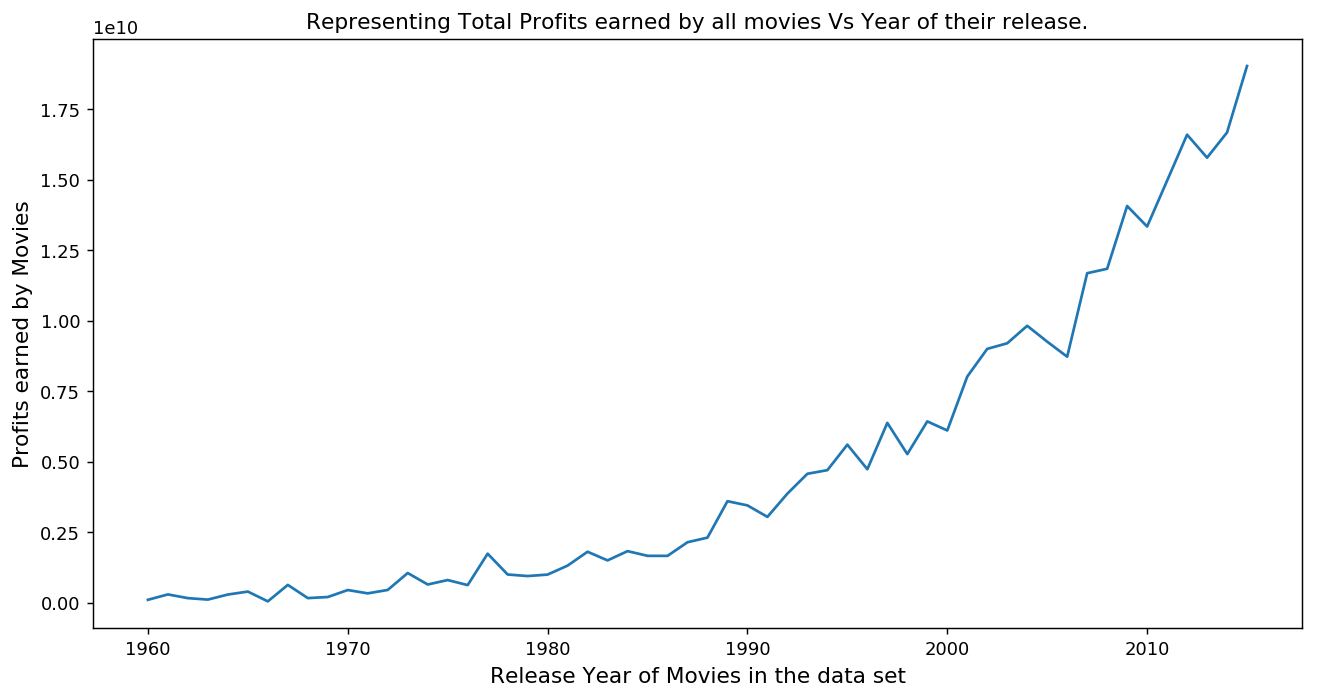

In [28]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

profits_year = df.groupby('release_year')['profit'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Profits earned by Movies', fontsize = 12)
#title of the line plot
plt.title('Representing Total Profits earned by all movies Vs Year of their release.')

#plotting the graph
plt.plot(profits_year)

#displaying the line plot
plt.show()

> * The above graph show that since 1960s the profit made by the film industry has been always increasing with few dips here and there but the overall trend is upwards.

#### Question3.2 : Graphical Representation of sum of budget of  movies released year wise

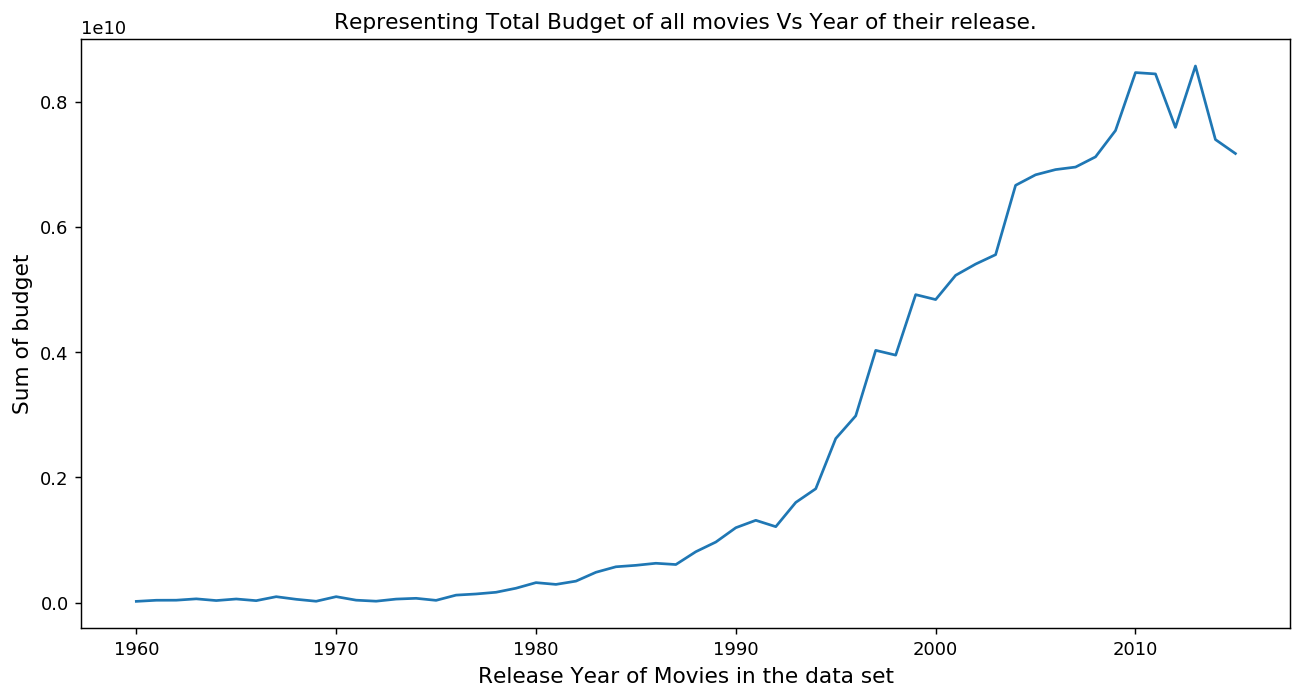

In [29]:
#We will be using Line plot for this analysis
#Since we want to know the profits of movies for every year therefore we have to sum up all the movies of a particular year

budget_year = df.groupby('release_year')['budget'].sum()

#figure size(width, height)
plt.figure(figsize=(12,6), dpi = 130)

#on x-axis
plt.xlabel('Release Year of Movies in the data set', fontsize = 12)
#on y-axis
plt.ylabel('Sum of budget', fontsize = 12)
#title of the line plot
plt.title('Representing Total Budget of all movies Vs Year of their release.')

#plotting the graph
plt.plot(budget_year)

#displaying the line plot
plt.show()

> * The money put in to making movies has constantly been increasing however there has been a dip around 2010-2011.

#### Question 3.3 : The most profitable year for the film industry

In [30]:
#Finding the most profitable year for the film industry
print('The most profitable year for the film industry has been {}'.format(profits_year.idxmax()))

The most profitable year for the film industry has been 2015


### Question 4 : Comparing the vote_average and profit made by each movie and forming a graph
>First we shall find the mean of the profit earned by each movie,based on which we shall have two sets of movies one with movies having made more profit than the mean and another with movies having made less profit than the mean.Further we shall plot a graph with vote_average for both the sets


In [31]:
profit_mean = df['profit'].mean()
print('The mean value of profits made by movies is {}'.format(profit_mean))

The mean value of profits made by movies is 70482919.14322782


In [32]:
#creating set of movies with profit made greater than the mean
profit_data = df[df['profit'] >= profit_mean]

In [33]:
#reindexing new data
profit_data.index = range(len(profit_data))

#we will start from 1 instead of 0
profit_data.index = profit_data.index + 1

In [34]:
profit_data.head(1)

,id,original_title,director,cast,genres,runtime,release_year,release_date,popularity,vote_count,vote_average,budget,revenue,profit
1,135397,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,124,2015,2015-06-09,32.985763,5562,6.5,150000000,1513528810,1363528810


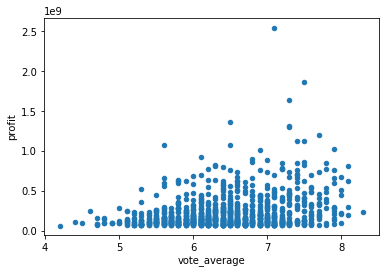

In [35]:
profit_data.plot(y='profit',x='vote_average',kind='scatter');

> * Inference from the scatter plot -the most profitable movie always have a better vote_average. 

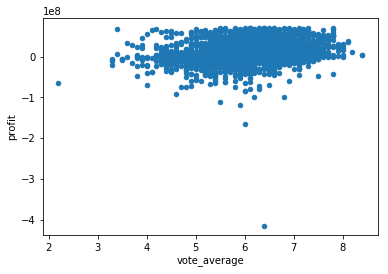

In [35]:
#creating set of movies with profit made less than the mean
loss_data = df[df['profit'] < profit_mean]
#reindexing new data
loss_data.index = range(len(loss_data))

#we will start from 1 instead of 0
loss_data.index = loss_data.index + 1
loss_data.plot(y='profit',x='vote_average',kind='scatter');

> * A large number of movies which became a loss seem to have vote_average to be between 5 and 7.

### Question 5 : Finding the number of movies released each year
>A histograph has been represent the movie released each year


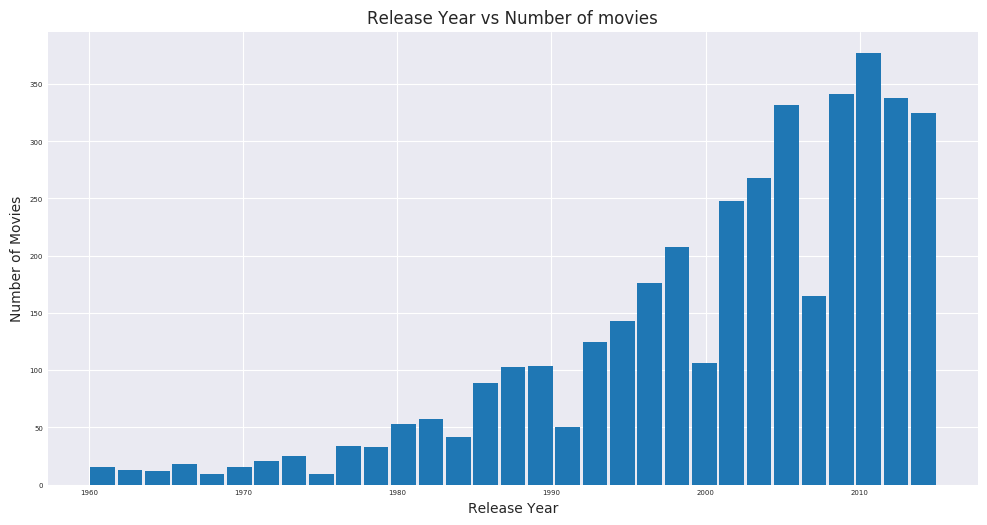

In [36]:
#plotting a histogram of runtime of movies

#gives styles to bg plot
sns.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 5)
plt.rc('ytick', labelsize = 5)

#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 100)
#x-axis label name
plt.xlabel('Release Year')
#y-axis label name
plt.ylabel('Number of Movies')
#title of the graph
plt.title('Release Year vs Number of movies')

#giving a histogram plot
plt.hist(df['release_year'], rwidth = 0.9, bins =31)
#displays the plot
plt.show()

> * The number of movies produced every has shown a upwards trend throughout.

### Question 6 : Cataegorising movies as hits and flops based on vote_average
>Here mean value of the vote_average is found first based on which movies are categorised as hits or flops,then there scatter plot vs. popularity is plotted

In [37]:
rating_mean = df['vote_average'].mean()
print('The mean value of vote_average of movies is {}'.format(rating_mean))

The mean value of vote_average of movies is 6.168162947586922


In [38]:
#creating a dataframe hits to contain all the movies with vote_average >= rating_mean
hits = df[df.vote_average >= rating_mean]
hits.head()

,id,original_title,director,cast,genres,runtime,release_year,release_date,popularity,vote_count,vote_average,budget,revenue,profit
0,135397,Jurassic World,Colin Trevorrow,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Action|Adventure|Science Fiction|Thriller,124,2015,2015-06-09,32.985763,5562,6.5,150000000,1513528810,1363528810
1,76341,Mad Max: Fury Road,George Miller,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,Action|Adventure|Science Fiction|Thriller,120,2015,2015-05-13,28.419936,6185,7.1,150000000,378436354,228436354
2,262500,Insurgent,Robert Schwentke,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Adventure|Science Fiction|Thriller,119,2015,2015-03-18,13.112507,2480,6.3,110000000,295238201,185238201
3,140607,Star Wars: The Force Awakens,J.J. Abrams,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,Action|Adventure|Science Fiction|Fantasy,136,2015,2015-12-15,11.173104,5292,7.5,200000000,2068178225,1868178225
4,168259,Furious 7,James Wan,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,Action|Crime|Thriller,137,2015,2015-04-01,9.335014,2947,7.3,190000000,1506249360,1316249360


In [39]:
#Finding number of hit movies
hits_rows,hits_columns = hits.shape
print('The number of hit movies are {}'.format(hits_rows))


The number of hit movies are 2012


In [40]:
#creating a dataframe hits to contain all the movies with vote_average < rating_mean
flops = df[df.vote_average < rating_mean]
flops.head()

,id,original_title,director,cast,genres,runtime,release_year,release_date,popularity,vote_count,vote_average,budget,revenue,profit
6,87101,Terminator Genisys,Alan Taylor,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Science Fiction|Action|Thriller|Adventure,125,2015,2015-06-23,8.654359,2598,5.8,155000000,440603537,285603537
11,76757,Jupiter Ascending,Lana Wachowski|Lilly Wachowski,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Science Fiction|Fantasy|Action|Adventure,124,2015,2015-02-04,6.189369,1937,5.2,176000003,183987723,7987720
13,257344,Pixels,Chris Columbus,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,Action|Comedy|Science Fiction,105,2015,2015-07-16,5.984995,1575,5.8,88000000,243637091,155637091
16,260346,Taken 3,Olivier Megaton,Liam Neeson|Forest Whitaker|Maggie Grace|Famke...,Crime|Action|Thriller,109,2015,2015-01-01,5.749758,1578,6.1,48000000,325771424,277771424
22,254128,San Andreas,Brad Peyton,Dwayne Johnson|Alexandra Daddario|Carla Gugino...,Action|Drama|Thriller,114,2015,2015-05-27,4.907832,2060,6.1,110000000,470490832,360490832


In [41]:
#Finding number of flops movies
flop_rows,flop_columns = flops.shape
print('The number of flop movies are {}'.format(flop_rows))

The number of flop movies are 1842


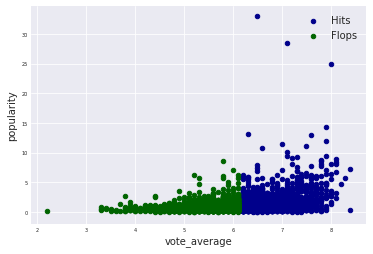

In [42]:
#plotting a scatter plot of hits and flops vs. popularity
ax = hits.plot.scatter(x='vote_average', y='popularity', color='DarkBlue', label='Hits');
flops.plot.scatter(x='vote_average', y='popularity', color='DarkGreen', label='Flops', ax=ax);

> * The dark blue section of the graph is the one with vote_average > 6.17(approx) looks more dense than other part and also we see that movies with high popularity always have ratings greater than the mean value.

### Question 7 : Plotting Profit vs Popularity 

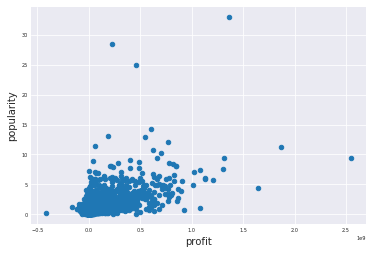

In [43]:
#plotting a scatter plot for profit vs popularity
df.plot(x='profit',y='popularity',kind='scatter'); #2 actually indicates 2*1e8 = 2e8 = 2 * 10^8 = 200,000,000.

> * There are several dots scattered in the high profit-high popularity zones.But the majority of dots fall in the popularity zone of 0-5.

###  Question 8 : Runtime distribution of all movies

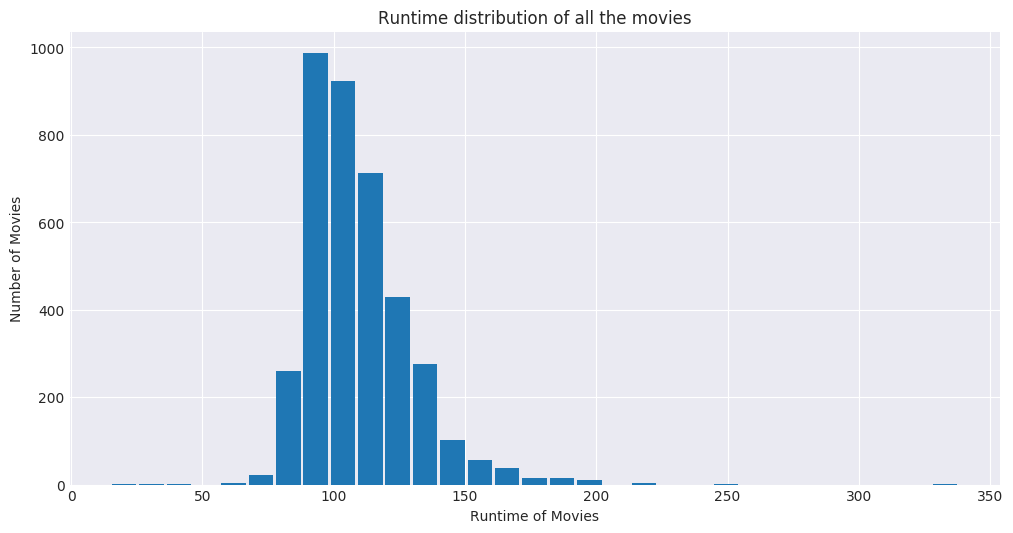

In [45]:
#plotting a histogram of runtime of movies

#gives styles to bg plot
sns.set_style('darkgrid')

#chaging the label size, this will change the size of all plots that we plot from now!
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

#giving the figure size(width, height)
plt.figure(figsize=(12,6), dpi = 100)
#x-axis label name
plt.xlabel('Runtime of Movies')
#y-axis label name
plt.ylabel('Number of Movies')
#title of the graph
plt.title('Runtime distribution of all the movies')

#giving a histogram plot
plt.hist(df['runtime'], rwidth = 0.9, bins =31)
#displays the plot
plt.show()

> * A lot of movies seem to be having runtime to be around 90-120 mins

### Question 9 : Finding the most repeated genres

In [47]:
#function which will take any column as argument from and keep its track 
def count(column):
    #will take a column, and separate the string by '|'
    data_sep = df[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data_sep = pd.Series(data_sep.split('|'))
    
    #arranging in descending order
    count = data_sep.value_counts(ascending = False)
    
    return count

In [48]:
#variable to store the retured value
count_genre = count('genres')
count_genre

Drama              1756
Comedy             1358
Thriller           1204
Action             1085
Adventure           749
Romance             667
Crime               651
Science Fiction     519
Horror              463
Family              425
Fantasy             396
Mystery             344
Animation           201
Music               136
History             129
War                 119
Western              52
Documentary          35
Foreign              13
TV Movie              1
dtype: int64

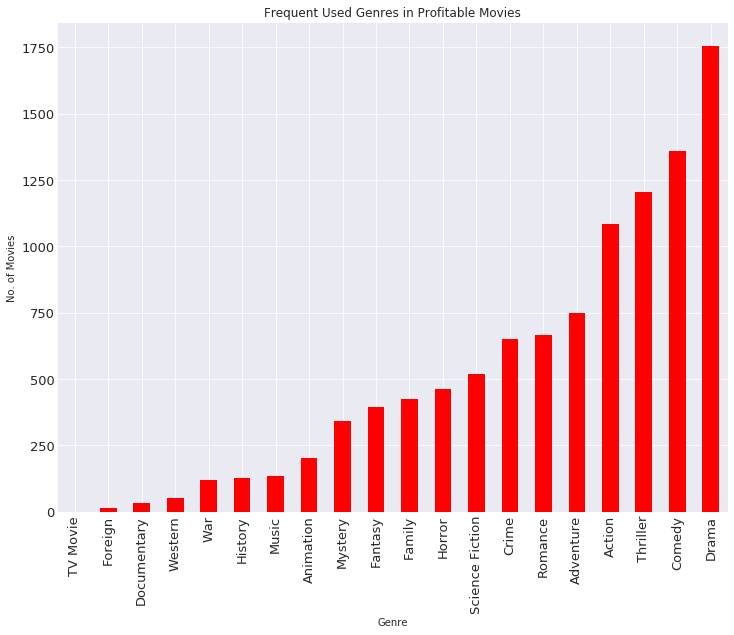

In [49]:
#lets plot the points in descending order top to bottom as we have data in same format.
count_genre.sort_values(ascending = True, inplace = True)

#ploting
lt = count_genre.plot.bar(color = 'RED', fontsize = 13)

#title
lt.set(title = 'Frequent Used Genres in Profitable Movies')

# on x axis
lt.set_xlabel('Genre')
#on y axis
lt.set_ylabel('No. of Movies')

#figure size(width, height)
lt.figure.set_size_inches(12, 9)

#ploting the graph
plt.show()

> * Drama is the most sought after genre followed by comedy and thriller while documentary foreign language movies and TV movies are in very less number.

### Question 10 : Finding the most repeated cast and directors of hit movies

In [50]:

#function which will take any column as argument from and keep its track 
def hits_count(column):
    #will take a column, and separate the string by '|'
    data = hits[column].str.cat(sep = '|')
    
    #giving pandas series and storing the values separately
    data = pd.Series(data.split('|'))
    
    #arranging in descending order
    count = data.value_counts(ascending = False)
    
    return count

In [51]:
count_cast = hits_count('cast') #hit movie dataset is based on the vote_average
print('Following are the Top 10 repeated cast of hit movies {}'.format (count_cast.head(10)))

Following are the Top 10 repeated cast of hit movies Robert De Niro       32
Brad Pitt            30
Tom Hanks            28
Tom Cruise           26
Johnny Depp          26
Denzel Washington    23
Samuel L. Jackson    23
Matt Damon           22
Morgan Freeman       21
Meryl Streep         21
dtype: int64


> * Robert De Niro,Brad Pitt,Tom Hanks are the top three actors of having worked in successful movies.

In [53]:
count_director = hits_count('director')
print('Following are the Top 10 repeated Directors of hit movies {}'.format (count_director.head(10)))

Following are the Top 10 repeated Directors of hit movies Steven Spielberg     21
Clint Eastwood       19
Martin Scorsese      17
Woody Allen          15
Ridley Scott         14
Tim Burton           14
Quentin Tarantino    12
Robert Zemeckis      12
Peter Jackson        11
Ron Howard           11
dtype: int64


> * Steven Spielberg has the highest number of hit movies been directed by him while Clint Eastwood and Martin Scorsese follow.

### That is all from the analysis part.

<a id='conclusions'></a>
## Conclusions
> * Avatar is the most profitable movie of all time with a profit of $2544505847 


> * Year 2015 has been the most successful year for the film industry in terms of profits.

> * The scatter plot between the vote_average and profit shows that most of the profitable movie have vote average between 5 and 7.5.

> * The number of movies released per year has shown an upwards trends throughout,after 2010 there has been great rise in the number movies released

> * There are a total of 2012 hit movie based on crieteria of vote_average being greater than or equal to approx. 6.17.

> * The vote_average vs popularity plot shows that popularity for both the hit and flop movies lie mostly between 0 to 5.

> * Most of the movies have runtime of 90 to 100 mins.

> * Drama,Comedy,Thriller,Action and Adventure are most successful genre.

> * Robert De Niro,Brad Pitt,Tom Hanks,Johny Depp,Tom Cruise are most successful casts.

> * Steven Spielberg,Clint Eastwood,Martin Scorsese are three of the most sucessful directors.


#### Predictions : Making a movie with runtime of 90-100 mins,casting Robert De Niro or Brad Pitt or Tom Hanks or Johny Depp or Tom Cruise and having Steven Spielberg or Clint Eastwood or Martin Scorsese as director and chossing the genre to be Drama,Comedy,Thriller,Action and Adventure can lead to production of the most profitable movie.

### Limitations:
> * After performing the clean actions on the dataset we only remain with 3853 datapoints where the initial dataset had 10855 datapoints.
> * Removal of over 1/3rd of the datapoints could lead to inaccurate analysis.
> * A large number of movies had to be dropped as there revenue or budget values were missing which may have lead to inapproprite outcome interms of other variable which had to dropped alongwith.


In [54]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0